In [582]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

df=pd.read_csv('train.csv')

df['Credit_Score'].unique()

C:\Users\User\AppData\Local\Temp\ipykernel_9360\1844614434.py:7: DtypeWarning:

Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.



array(['Good', 'Standard', 'Poor'], dtype=object)

In [583]:
# create a dictionary to map the string values to integer values
score_map = {'Poor': 1, 'Standard': 2, 'Good': 3}

# replace the string values with integer values using the map
df['Credit_Score'] = df['Credit_Score'].replace(score_map).astype(int)

In [584]:
# remove the underscore character from all columns in the dataframe
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace('_', '')

In [585]:
for col in df.columns:
    try:
        df[col] = df[col].astype(float)
    except:
        pass

In [586]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              88592 non-null   ob

In [587]:
df=df.drop('Customer_ID',axis=1)
df=df.drop('ID',axis=1)
df=df.drop('Month',axis=1)
df=df.drop('Name',axis=1)
df=df.drop('SSN',axis=1)

In [588]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Occupation                100000 non-null  object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               100000 non-null  float64
 8   Type_of_Loan              88592 non-null   object 
 9   Delay_from_due_date       100000 non-null  float64
 10  Num_of_Delayed_Payment    92998 non-null   float64
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

In [589]:
# Calculate the mean credit score for each occupation
occupation_mean_credit = df.groupby('Occupation')['Credit_Score'].mean()

# Sort the occupations by their mean credit score in ascending order
sorted_occupations = occupation_mean_credit.sort_values(ascending=True)
print(sorted_occupations)

# Create a dictionary to map each occupation to a number
occupation_dict = {occupation: i+1 for i, occupation in enumerate(sorted_occupations.index)}

# Add a new column to the dataframe to show the occupation number
df['Occupation Number'] = df['Occupation'].map(occupation_dict)

df.groupby('Occupation Number')['Credit_Score'].mean()


df['Occupation']=df['Occupation Number']

df=df.drop('Occupation Number',axis=1)

Occupation
Writer          1.839932
Mechanic        1.861389
Entrepreneur    1.867833
Scientist       1.873948
Teacher         1.879002
Accountant      1.880242
Engineer        1.881890
                1.888417
Manager         1.893856
Developer       1.894467
Lawyer          1.901445
Doctor          1.904879
Musician        1.905261
Architect       1.907160
Journalist      1.909285
MediaManager    1.922336
Name: Credit_Score, dtype: float64


In [590]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Occupation                100000 non-null  int64  
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               100000 non-null  float64
 8   Type_of_Loan              88592 non-null   object 
 9   Delay_from_due_date       100000 non-null  float64
 10  Num_of_Delayed_Payment    92998 non-null   float64
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

In [591]:
df['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [592]:
value=df['Num_of_Loan'].median()
df['Type_of_Loan'] = df['Type_of_Loan'].fillna(value)

# Count number of elements separated by comma
num_elements = df['Type_of_Loan'].astype(str).apply(lambda x: x.count(',') + 1 if x!= 'Not Specified'  else 0)

# Create new column
df = df.assign(Num_of_Loan_Types=num_elements)

# Replace the values in the specified rows with Num_of_Loan_Types cloumn value
df.loc[(df['Num_of_Loan'] > 9) | (df['Num_of_Loan'] < 0), 'Num_of_Loan'] = df['Num_of_Loan_Types']
print(df[(df['Num_of_Loan'] > 9) | (df['Num_of_Loan'] < 0)])


# Check the correlation between the two columns
corr = df['Num_of_Loan'].corr(df['Num_of_Loan_Types'])

print('Correlation between Num_of_Loan and Num_of_Loan_Types_int:', corr)
df['Num_of_Loan'].describe()


df=df.drop('Num_of_Loan_Types',axis=1)
df=df.drop('Type_of_Loan',axis=1)

Empty DataFrame
Columns: [Age, Occupation, Annual_Income, Monthly_Inhand_Salary, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Type_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score, Num_of_Loan_Types]
Index: []

[0 rows x 24 columns]
Correlation between Num_of_Loan and Num_of_Loan_Types_int: 0.9913333441480534


In [593]:
# create a dictionary to map the string values to integer values
score_map = {'Bad': 0, 'Standard': 1, '':2, 'Good': 3}

# replace the string values with integer values using the map
df['Credit_Mix'] = df['Credit_Mix'].replace(score_map)
print(df['Credit_Mix'].dtypes)
df['Credit_Mix'].unique()

int64


array([2, 3, 1, 0], dtype=int64)

In [594]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Occupation                100000 non-null  int64  
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               100000 non-null  float64
 8   Delay_from_due_date       100000 non-null  float64
 9   Num_of_Delayed_Payment    92998 non-null   float64
 10  Changed_Credit_Limit      100000 non-null  object 
 11  Num_Credit_Inquiries      98035 non-null   float64
 12  Credit_Mix                100000 non-null  int64  
 13  Outstanding_Debt          100000 non-null  fl

In [595]:
print(df['Changed_Credit_Limit'].unique())

# replace empty strings with NaN values in the 'Changed_Credit_Limit' column
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].replace('', np.nan)

# convert the 'Changed_Credit_Limit' column from string to float data type
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype(float)

['11.27' '' '6.27' ... '17.509999999999998' '25.16' '21.17']


In [596]:
print(df['Credit_History_Age'].unique())

['22 Years and 1 Months' nan '22 Years and 3 Months'
 '22 Years and 4 Months' '22 Years and 5 Months' '22 Years and 6 Months'
 '22 Years and 7 Months' '26 Years and 7 Months' '26 Years and 8 Months'
 '26 Years and 9 Months' '26 Years and 10 Months' '26 Years and 11 Months'
 '27 Years and 0 Months' '27 Years and 1 Months' '27 Years and 2 Months'
 '17 Years and 9 Months' '17 Years and 10 Months' '17 Years and 11 Months'
 '18 Years and 1 Months' '18 Years and 2 Months' '18 Years and 3 Months'
 '18 Years and 4 Months' '17 Years and 3 Months' '17 Years and 4 Months'
 '17 Years and 5 Months' '17 Years and 6 Months' '17 Years and 7 Months'
 '17 Years and 8 Months' '30 Years and 8 Months' '30 Years and 9 Months'
 '30 Years and 10 Months' '30 Years and 11 Months' '31 Years and 0 Months'
 '31 Years and 1 Months' '31 Years and 2 Months' '31 Years and 3 Months'
 '32 Years and 0 Months' '32 Years and 2 Months' '32 Years and 3 Months'
 '32 Years and 5 Months' '32 Years and 6 Months' '30 Years and 7 

In [597]:
# create a function to convert 'Years and Months' to months
def year_month_to_month(s):
    if isinstance(s, str):
        years, months = s.split(' Years and ')
        months = months.replace(' Months', '')
        total_months = int(years)*12 + int(months)
        return total_months
    else:
        return np.nan

# apply the function to the 'Credit_History_Age' column
df['Credit_History_Age'] = df['Credit_History_Age'].apply(year_month_to_month)


In [598]:

# create a dictionary to map the string values to integer values
score_map = {'No': 2, 'NM': 1, 'Yes': 0}

# replace the string values with integer values using the map
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace(score_map)
print(df['Payment_of_Min_Amount'].dtypes)
df['Payment_of_Min_Amount'].unique() 

int64


array([2, 1, 0], dtype=int64)

In [599]:
df['Payment_Behaviour'].unique()   
grouped_df = df.groupby('Payment_Behaviour')['Credit_Score'].mean().reset_index()
sorted_df = grouped_df.sort_values(by='Credit_Score', ascending=False)
sorted_df


Payment_Behaviour  Credit_Score
1   HighspentLargevaluepayments      2.014066
2  HighspentMediumvaluepayments      1.947834
3   HighspentSmallvaluepayments      1.914109
4    LowspentLargevaluepayments      1.899185
0                        !@9#%8      1.889211
5   LowspentMediumvaluepayments      1.875262
6    LowspentSmallvaluepayments      1.770627

In [600]:
# create a dictionary to map the string values to integer values
score_map = {'HighspentLargevaluepayments': 1, 'HighspentMediumvaluepayments': 2, 'HighspentSmallvaluepayments': 3,
             'LowspentLargevaluepayments':4,'!@9#%8':5,'LowspentMediumvaluepayments':6,
             'LowspentSmallvaluepayments':7}

# replace the string values with integer values using the map
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace(score_map).astype(int)
df['Payment_Behaviour'].unique() 

array([3, 4, 6, 7, 2, 5, 1])

In [601]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Occupation                100000 non-null  int64  
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  float64
 5   Num_Credit_Card           100000 non-null  float64
 6   Interest_Rate             100000 non-null  float64
 7   Num_of_Loan               100000 non-null  float64
 8   Delay_from_due_date       100000 non-null  float64
 9   Num_of_Delayed_Payment    92998 non-null   float64
 10  Changed_Credit_Limit      97909 non-null   float64
 11  Num_Credit_Inquiries      98035 non-null   float64
 12  Credit_Mix                100000 non-null  int64  
 13  Outstanding_Debt          100000 non-null  fl

In [602]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


# Filter the data
df_filtered = df[df['Annual_Income'] < 180000]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_filtered.loc[df_filtered['Monthly_Inhand_Salary'].notnull(), 'Annual_Income'].values.reshape(-1, 1),
    df_filtered.loc[df_filtered['Monthly_Inhand_Salary'].notnull(), 'Monthly_Inhand_Salary'].values.reshape(-1, 1),
    test_size=0.3,
    random_state=42
)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on testing set
y_pred = model.predict(X_test)

# Print evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('RMSE:', rmse)
print('R2:', r2)

MSE: 36320.81283907548
RMSE: 190.58020054317154
R2: 0.9963847758800946


In [603]:
# Filter the data
df_filtered = df[df['Annual_Income'] <= 180000]

# Split the data into training and testing sets
X_train = df.loc[df['Monthly_Inhand_Salary'].notnull() & (df['Annual_Income'] <= 180000), 'Annual_Income'].values.reshape(-1, 1)
y_train = df.loc[df['Monthly_Inhand_Salary'].notnull() & (df['Annual_Income'] <= 180000), 'Monthly_Inhand_Salary'].values.reshape(-1, 1)

# Split the data into testing set
X_test = df.loc[df['Monthly_Inhand_Salary'].isnull() & (df['Annual_Income'] <= 180000), 'Annual_Income'].values.reshape(-1, 1)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the missing values
y_pred = model.predict(X_test)

# Fill the missing values with predicted values
df.loc[df['Monthly_Inhand_Salary'].isnull() & (df['Annual_Income'] <= 180000), 'Monthly_Inhand_Salary'] = y_pred

# Fill the remaining missing values with mean
mean = df['Monthly_Inhand_Salary'].mean()
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(mean)

print('Monthly_Inhand_Salary null values count:',df['Monthly_Inhand_Salary'].isnull().sum())

df=df.drop('Annual_Income',axis=1)

Monthly_Inhand_Salary null values count: 0


In [604]:
filtered_df = df[df['Monthly_Inhand_Salary'] < 0]
filtered_df['Credit_Score'].mean()

nan

In [605]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  float64
 1   Occupation                100000 non-null  int64  
 2   Monthly_Inhand_Salary     100000 non-null  float64
 3   Num_Bank_Accounts         100000 non-null  float64
 4   Num_Credit_Card           100000 non-null  float64
 5   Interest_Rate             100000 non-null  float64
 6   Num_of_Loan               100000 non-null  float64
 7   Delay_from_due_date       100000 non-null  float64
 8   Num_of_Delayed_Payment    92998 non-null   float64
 9   Changed_Credit_Limit      97909 non-null   float64
 10  Num_Credit_Inquiries      98035 non-null   float64
 11  Credit_Mix                100000 non-null  int64  
 12  Outstanding_Debt          100000 non-null  float64
 13  Credit_Utilization_Ratio  100000 non-null  fl

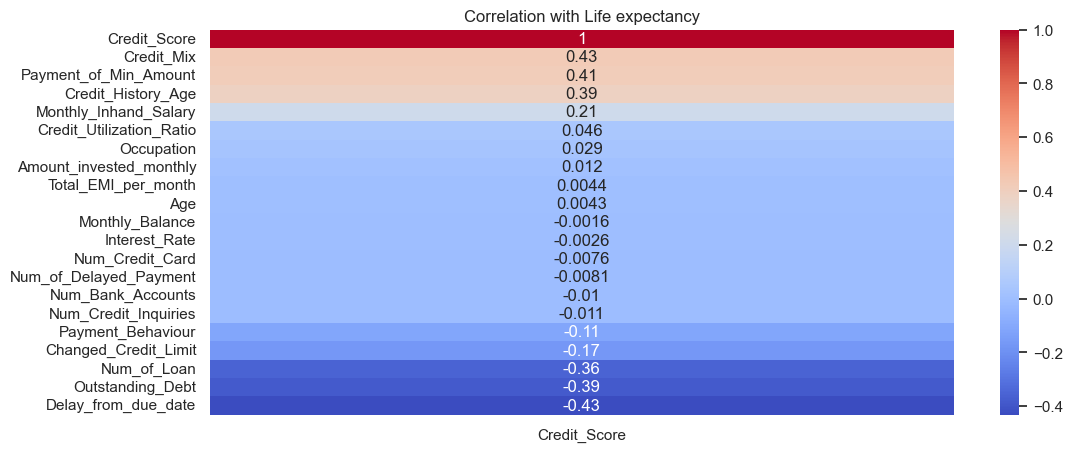

In [606]:
corr_df = df.corr()[['Credit_Score']].sort_values('Credit_Score', ascending=False)


fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', ax=ax)
ax.set_title("Correlation with Life expectancy")
plt.show()

In [607]:
import pandas as pd
import plotly.express as px

bigger34_df = df[df['Interest_Rate'] > 34].copy()
equal34_df = df[df['Interest_Rate'] == 34].copy()

# Add a "Label" column to each dataset
df['Label'] = 'All bank account'
bigger34_df['Label'] = 'Bigger than 34'
equal34_df['Label'] = 'Interest rate equal to 34'

# Combine the datasets into one
combined_df = pd.concat([df, equal34_df, bigger34_df ], ignore_index=True)

# Create the violin plot
fig = px.violin(combined_df, x='Label', y='Credit_Score', color='Label',
                template='plotly_dark', 
                title='Impact of Interest Rate Distribution on Credit Score ',width=750)

# Show the plot
fig.show()
df=df.drop('Label',axis=1)


In [608]:
outlier_dict={}

for column in df.columns:
    outlier_dict[column]=[df[column].quantile(0.97),df[column].max(),df[df[column]<0][column].count()]
    

In [609]:
outlier_dict

{'Age': [55.0, 8698.0, 886],
 'Occupation': [16.0, 16, 0],
 'Monthly_Inhand_Salary': [11791.056666666664, 15204.633333333331, 0],
 'Num_Bank_Accounts': [10.0, 1798.0, 21],
 'Num_Credit_Card': [10.0, 1499.0, 0],
 'Interest_Rate': [34.0, 5797.0, 0],
 'Num_of_Loan': [9.0, 9.0, 0],
 'Delay_from_due_date': [57.0, 67.0, 591],
 'Num_of_Delayed_Payment': [25.0, 4397.0, 644],
 'Changed_Credit_Limit': [25.97, 36.97, 1586],
 'Num_Credit_Inquiries': [15.0, 2597.0, 0],
 'Credit_Mix': [3.0, 3, 0],
 'Outstanding_Debt': [4448.267299999999, 4998.07, 0],
 'Credit_Utilization_Ratio': [40.926974029280785, 50.00000000000001, 0],
 'Credit_History_Age': [389.0, 404.0, 0],
 'Payment_of_Min_Amount': [2.0, 2, 0],
 'Total_EMI_per_month': [4655.149999999994, 82331.0, 0],
 'Amount_invested_monthly': [10000.0, 10000.0, 0],
 'Payment_Behaviour': [7.0, 7, 0],
 'Monthly_Balance': [962.7382408111604, 1602.0405189622518, 9],
 'Credit_Score': [3.0, 3.0, 0]}

In [610]:
mean_age = df[(df['Age'] >= 0) & (df['Age'] <= 55)]['Age'].mean()

# replace Age column where it is older than 55 with the mean value
df.loc[df['Age'] > 55, 'Age'] = mean_age
df.loc[df['Age'] < 0, 'Age'] = mean_age

In [611]:
mean = df[(df['Num_Bank_Accounts'] >= 0) & (df['Num_Bank_Accounts'] <= 10)]['Num_Bank_Accounts'].mean()

# replace  column where it is older than 10 with the mean value
df.loc[df['Num_Bank_Accounts'] > 10, 'Num_Bank_Accounts'] = mean
df.loc[df['Num_Bank_Accounts'] < 0, 'Num_Bank_Accounts'] = mean

In [612]:
mean = df[(df['Num_Credit_Card'] >= 0) & (df['Num_Credit_Card'] <= 10)]['Num_Credit_Card'].mean()

# replace  column where it is older than 10 with the mean value
df.loc[df['Num_Credit_Card'] > 10, 'Num_Credit_Card'] = mean
df.loc[df['Num_Credit_Card'] < 0, 'Num_Credit_Card'] = mean

In [613]:
mean = df[(df['Interest_Rate'] >= 0) & (df['Interest_Rate'] <= 34)]['Interest_Rate'].mean()

# replace column where it is older than 34 with the mean value
df.loc[df['Interest_Rate'] > 34, 'Interest_Rate'] = mean
df.loc[df['Interest_Rate'] < 0, 'Interest_Rate'] = mean

In [614]:
mean = df[(df['Delay_from_due_date'] >= 0) ]['Delay_from_due_date'].mean()


df.loc[df['Delay_from_due_date'] < 0, 'Delay_from_due_date'] = mean

In [615]:
mean = df[(df['Num_of_Delayed_Payment'] >= 0) & (df['Num_of_Delayed_Payment'] <= 25)]['Num_of_Delayed_Payment'].mean()

# replace column where it is older than 25 with the mean value
df.loc[df['Num_of_Delayed_Payment'] > 25, 'Num_of_Delayed_Payment'] = mean
df.loc[df['Num_of_Delayed_Payment'] < 0, 'Num_of_Delayed_Payment'] = mean

In [616]:
mean = df[(df['Changed_Credit_Limit'] >= 0)]['Changed_Credit_Limit'].mean()


df.loc[df['Changed_Credit_Limit'] < 0, 'Changed_Credit_Limit'] = mean

In [617]:
mean = df[(df['Num_Credit_Inquiries'] >= 0) & (df['Num_Credit_Inquiries'] <= 15)]['Num_Credit_Inquiries'].mean()

# replace column where it is older than 15 with the mean value
df.loc[df['Num_Credit_Inquiries'] > 15, 'Num_Credit_Inquiries'] = mean
df.loc[df['Num_Credit_Inquiries'] < 0, 'Num_Credit_Inquiries'] = mean

In [618]:
mean = df[(df['Total_EMI_per_month'] >= 0) & (df['Total_EMI_per_month'] <= 4655)]['Total_EMI_per_month'].mean()

# replace column where it is older than 15 with the mean value
df.loc[df['Total_EMI_per_month'] > 4655, 'Total_EMI_per_month'] = mean
df.loc[df['Total_EMI_per_month'] < 0, 'Total_EMI_per_month'] = mean

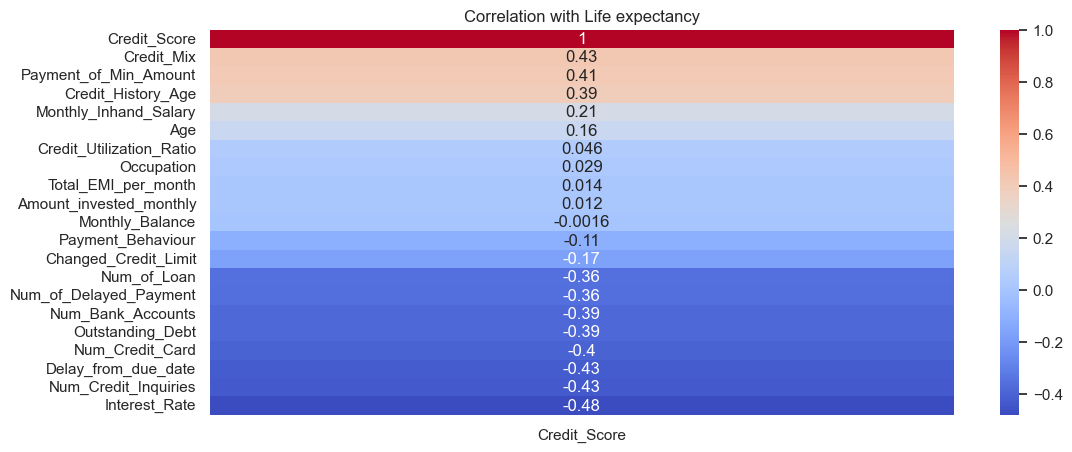

In [619]:
corr_df = df.corr()[['Credit_Score']].sort_values('Credit_Score', ascending=False)


fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', ax=ax)
ax.set_title("Correlation with Life expectancy")
plt.show()

In [620]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75387 entries, 0 to 98303
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       75387 non-null  float64
 1   Occupation                75387 non-null  int64  
 2   Monthly_Inhand_Salary     75387 non-null  float64
 3   Num_Bank_Accounts         75387 non-null  float64
 4   Num_Credit_Card           75387 non-null  float64
 5   Interest_Rate             75387 non-null  float64
 6   Num_of_Loan               75387 non-null  float64
 7   Delay_from_due_date       75387 non-null  float64
 8   Num_of_Delayed_Payment    75387 non-null  float64
 9   Changed_Credit_Limit      75387 non-null  float64
 10  Num_Credit_Inquiries      75387 non-null  float64
 11  Credit_Mix                75387 non-null  int64  
 12  Outstanding_Debt          75387 non-null  float64
 13  Credit_Utilization_Ratio  75387 non-null  float64
 14  Credit_Hist

In [621]:
df.to_csv('clean_data.csv', index=False)